## Jupyter Notebook for pre-training data analysis and visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load dataset
df = pd.read_csv("STEMx-2025-AI-Astro-Material/HWC_selected_features_with_esi_for_training.csv")
print("Dataset loaded with shape:", df.shape)

Dataset loaded with shape: (5317, 11)


### Basic Info

In [5]:
display(df.head())
print(df.info())
display(df.describe())

,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_PERIOD,P_SEMI_MAJOR_AXIS,S_TEMPERATURE,S_MASS,S_RADIUS,P_FLUX,P_GRAVITY,P_ESI
0,16.60,2.90,541.98483,31.884000,0.1994,5779.0,1.10,1.03,20.490365,1.973841,0.272032
1,5.10,2.11,1001.11710,6.883376,0.0678,5698.0,0.98,0.97,238.528680,1.145527,0.254763
2,12.20,3.52,1104.46820,1.921036,0.0291,5060.0,0.89,0.82,353.357260,0.984633,0.193906
3,4.94,2.07,681.30334,11.119907,0.0911,5240.0,0.87,0.79,51.163853,1.152886,0.276721
4,13.20,2.76,595.75408,7.493134,0.0657,4227.0,0.68,0.67,29.913640,1.732829,0.260440


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_MASS             5317 non-null   float64
 1   P_RADIUS           5317 non-null   float64
 2   P_TEMP_EQUIL       5317 non-null   float64
 3   P_PERIOD           5317 non-null   float64
 4   P_SEMI_MAJOR_AXIS  5317 non-null   float64
 5   S_TEMPERATURE      5317 non-null   float64
 6   S_MASS             5317 non-null   float64
 7   S_RADIUS           5317 non-null   float64
 8   P_FLUX             5317 non-null   float64
 9   P_GRAVITY          5317 non-null   float64
 10  P_ESI              5317 non-null   float64
dtypes: float64(11)
memory usage: 457.1 KB
None


,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_PERIOD,P_SEMI_MAJOR_AXIS,S_TEMPERATURE,S_MASS,S_RADIUS,P_FLUX,P_GRAVITY,P_ESI
count,5317.000000,5317.000000,5317.000000,5.317000e+03,5317.000000,5317.000000,5317.000000,5317.000000,5.317000e+03,5317.000000,5317.000000
mean,394.785741,5.446898,796.113017,8.006884e+04,2.136721,5397.574350,0.968072,1.549033,5.583316e+02,3.727917,0.258471
std,2377.561094,5.135477,460.884552,5.515584e+06,103.151704,1345.927216,0.389267,4.216313,1.033041e+04,14.030870,0.131056
min,0.037400,0.310000,1.084914,1.797190e-01,0.005800,580.500000,0.010000,0.010000,3.289901e-10,0.038086,0.032156
25%,3.890000,1.740000,464.687090,4.465300e+00,0.051600,4953.000000,0.810000,0.780000,1.135083e+01,1.022822,0.190542
50%,8.250000,2.690000,731.315270,1.152310e+01,0.095600,5557.000000,0.950000,0.950000,6.864427e+01,1.163903,0.268611
75%,116.780270,10.761000,1053.342800,4.071570e+01,0.227000,5900.000000,1.100000,1.240000,2.946004e+02,1.448082,0.301518
max,89700.000000,32.600000,7194.888800,4.020000e+08,7506.000000,40000.000000,10.940000,109.460000,6.363521e+05,387.976070,0.968362


### Distribution Plots

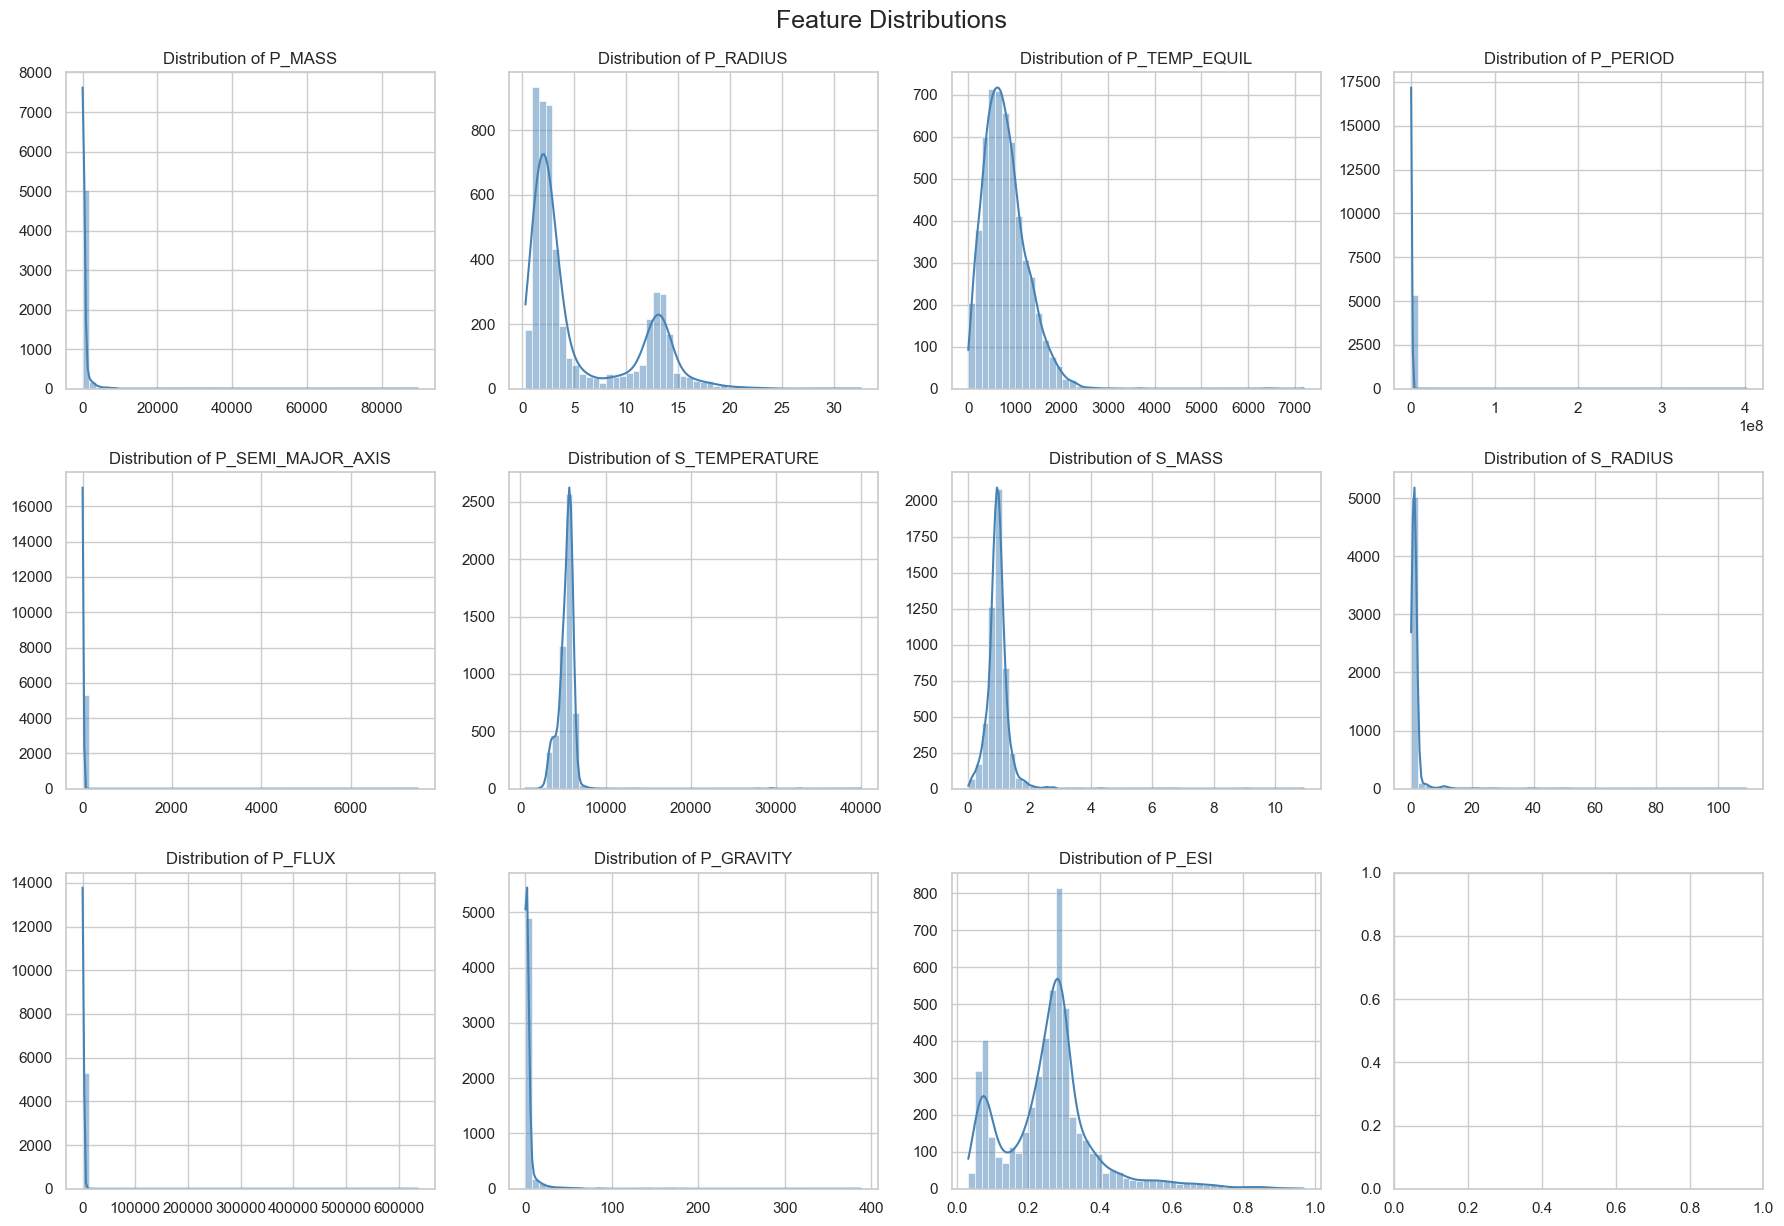

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50, color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.show()


### Boxplots for outlier detection

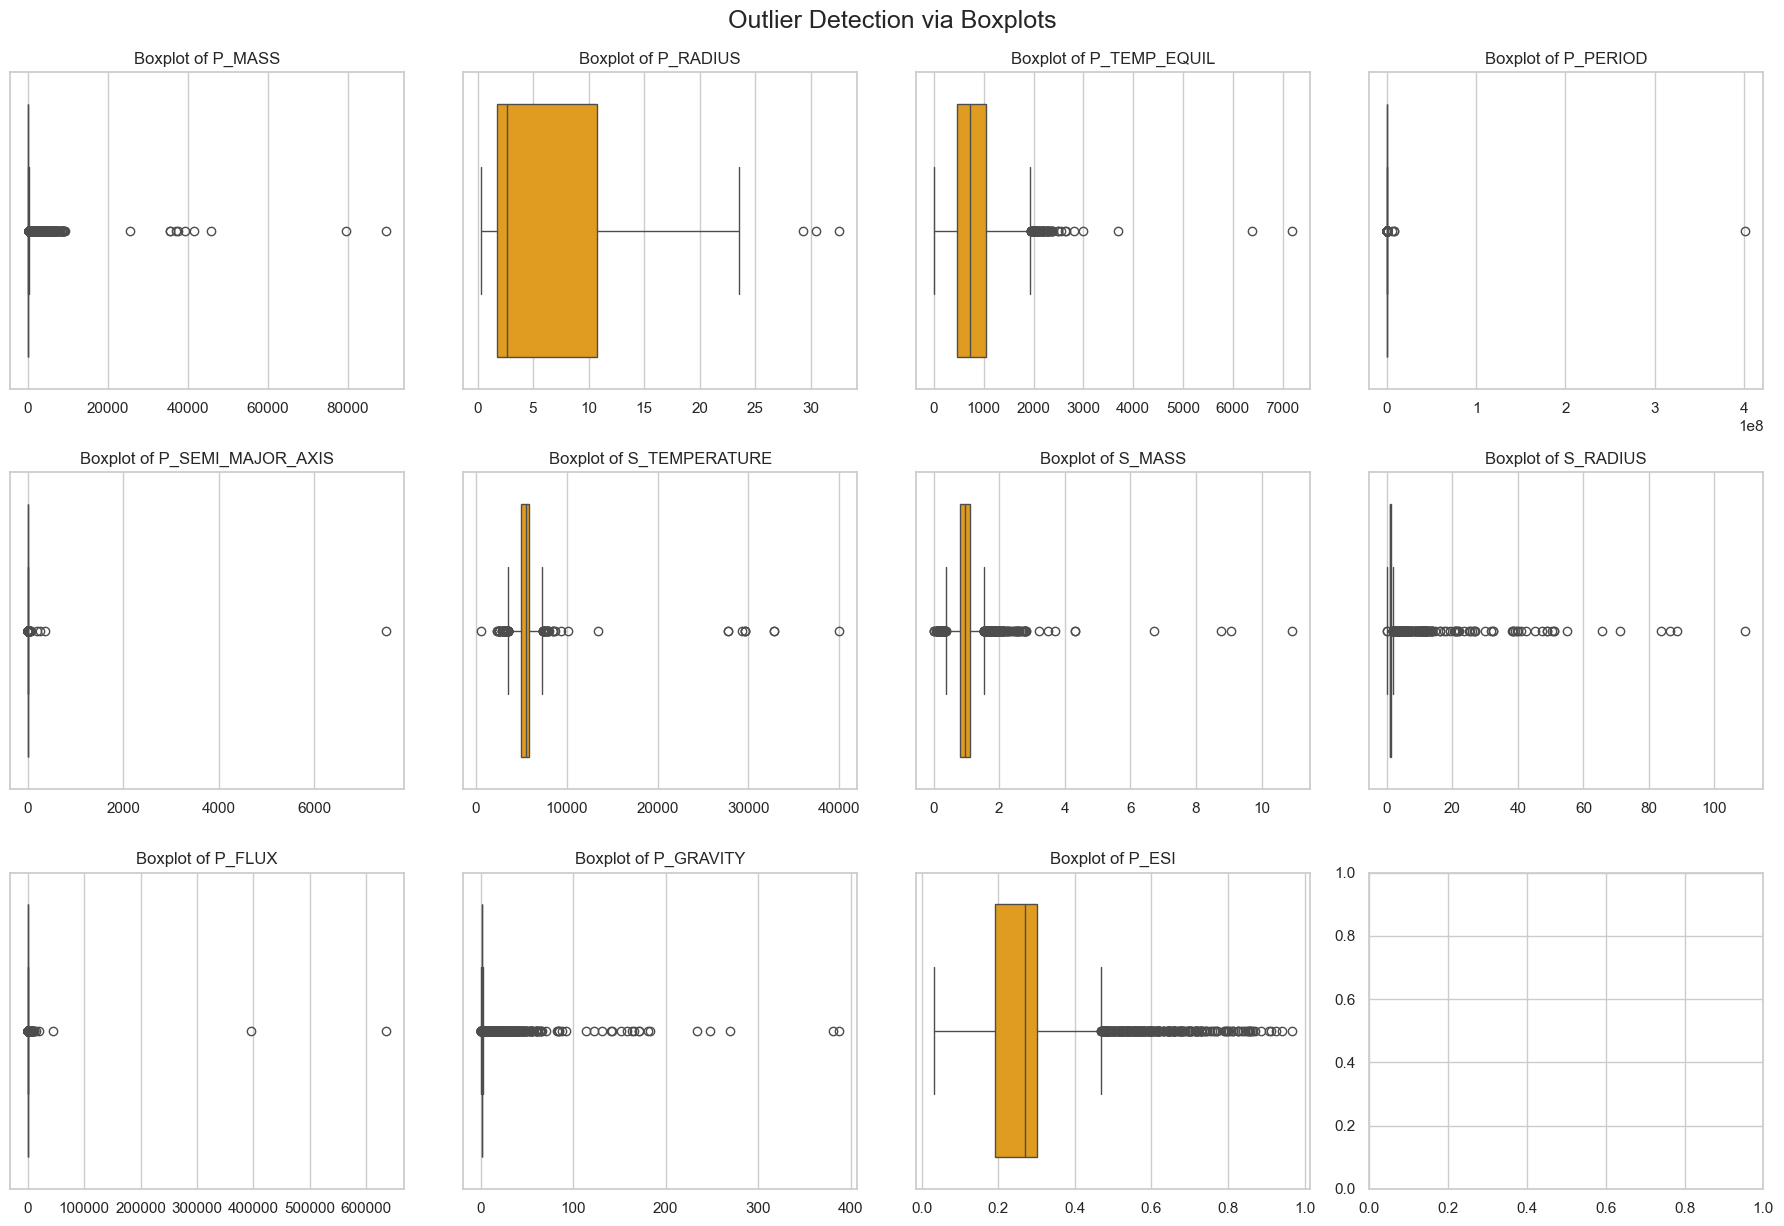

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.suptitle("Outlier Detection via Boxplots", fontsize=18, y=1.02)
plt.show()

### Correlation Heatmap

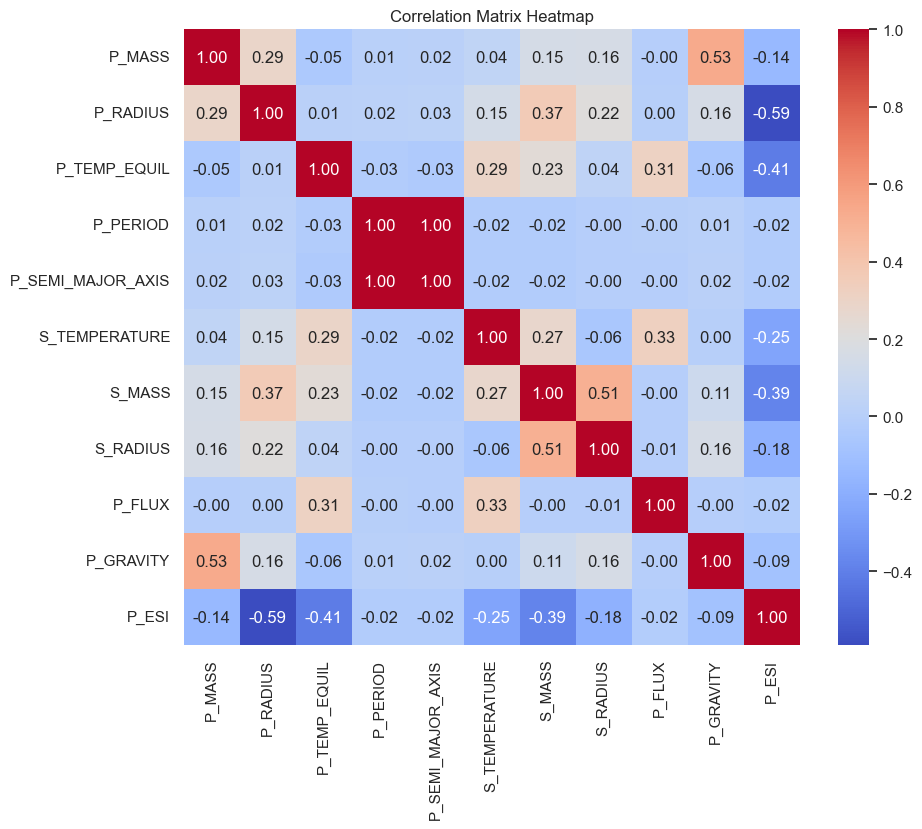

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Scatter Plot against ESI

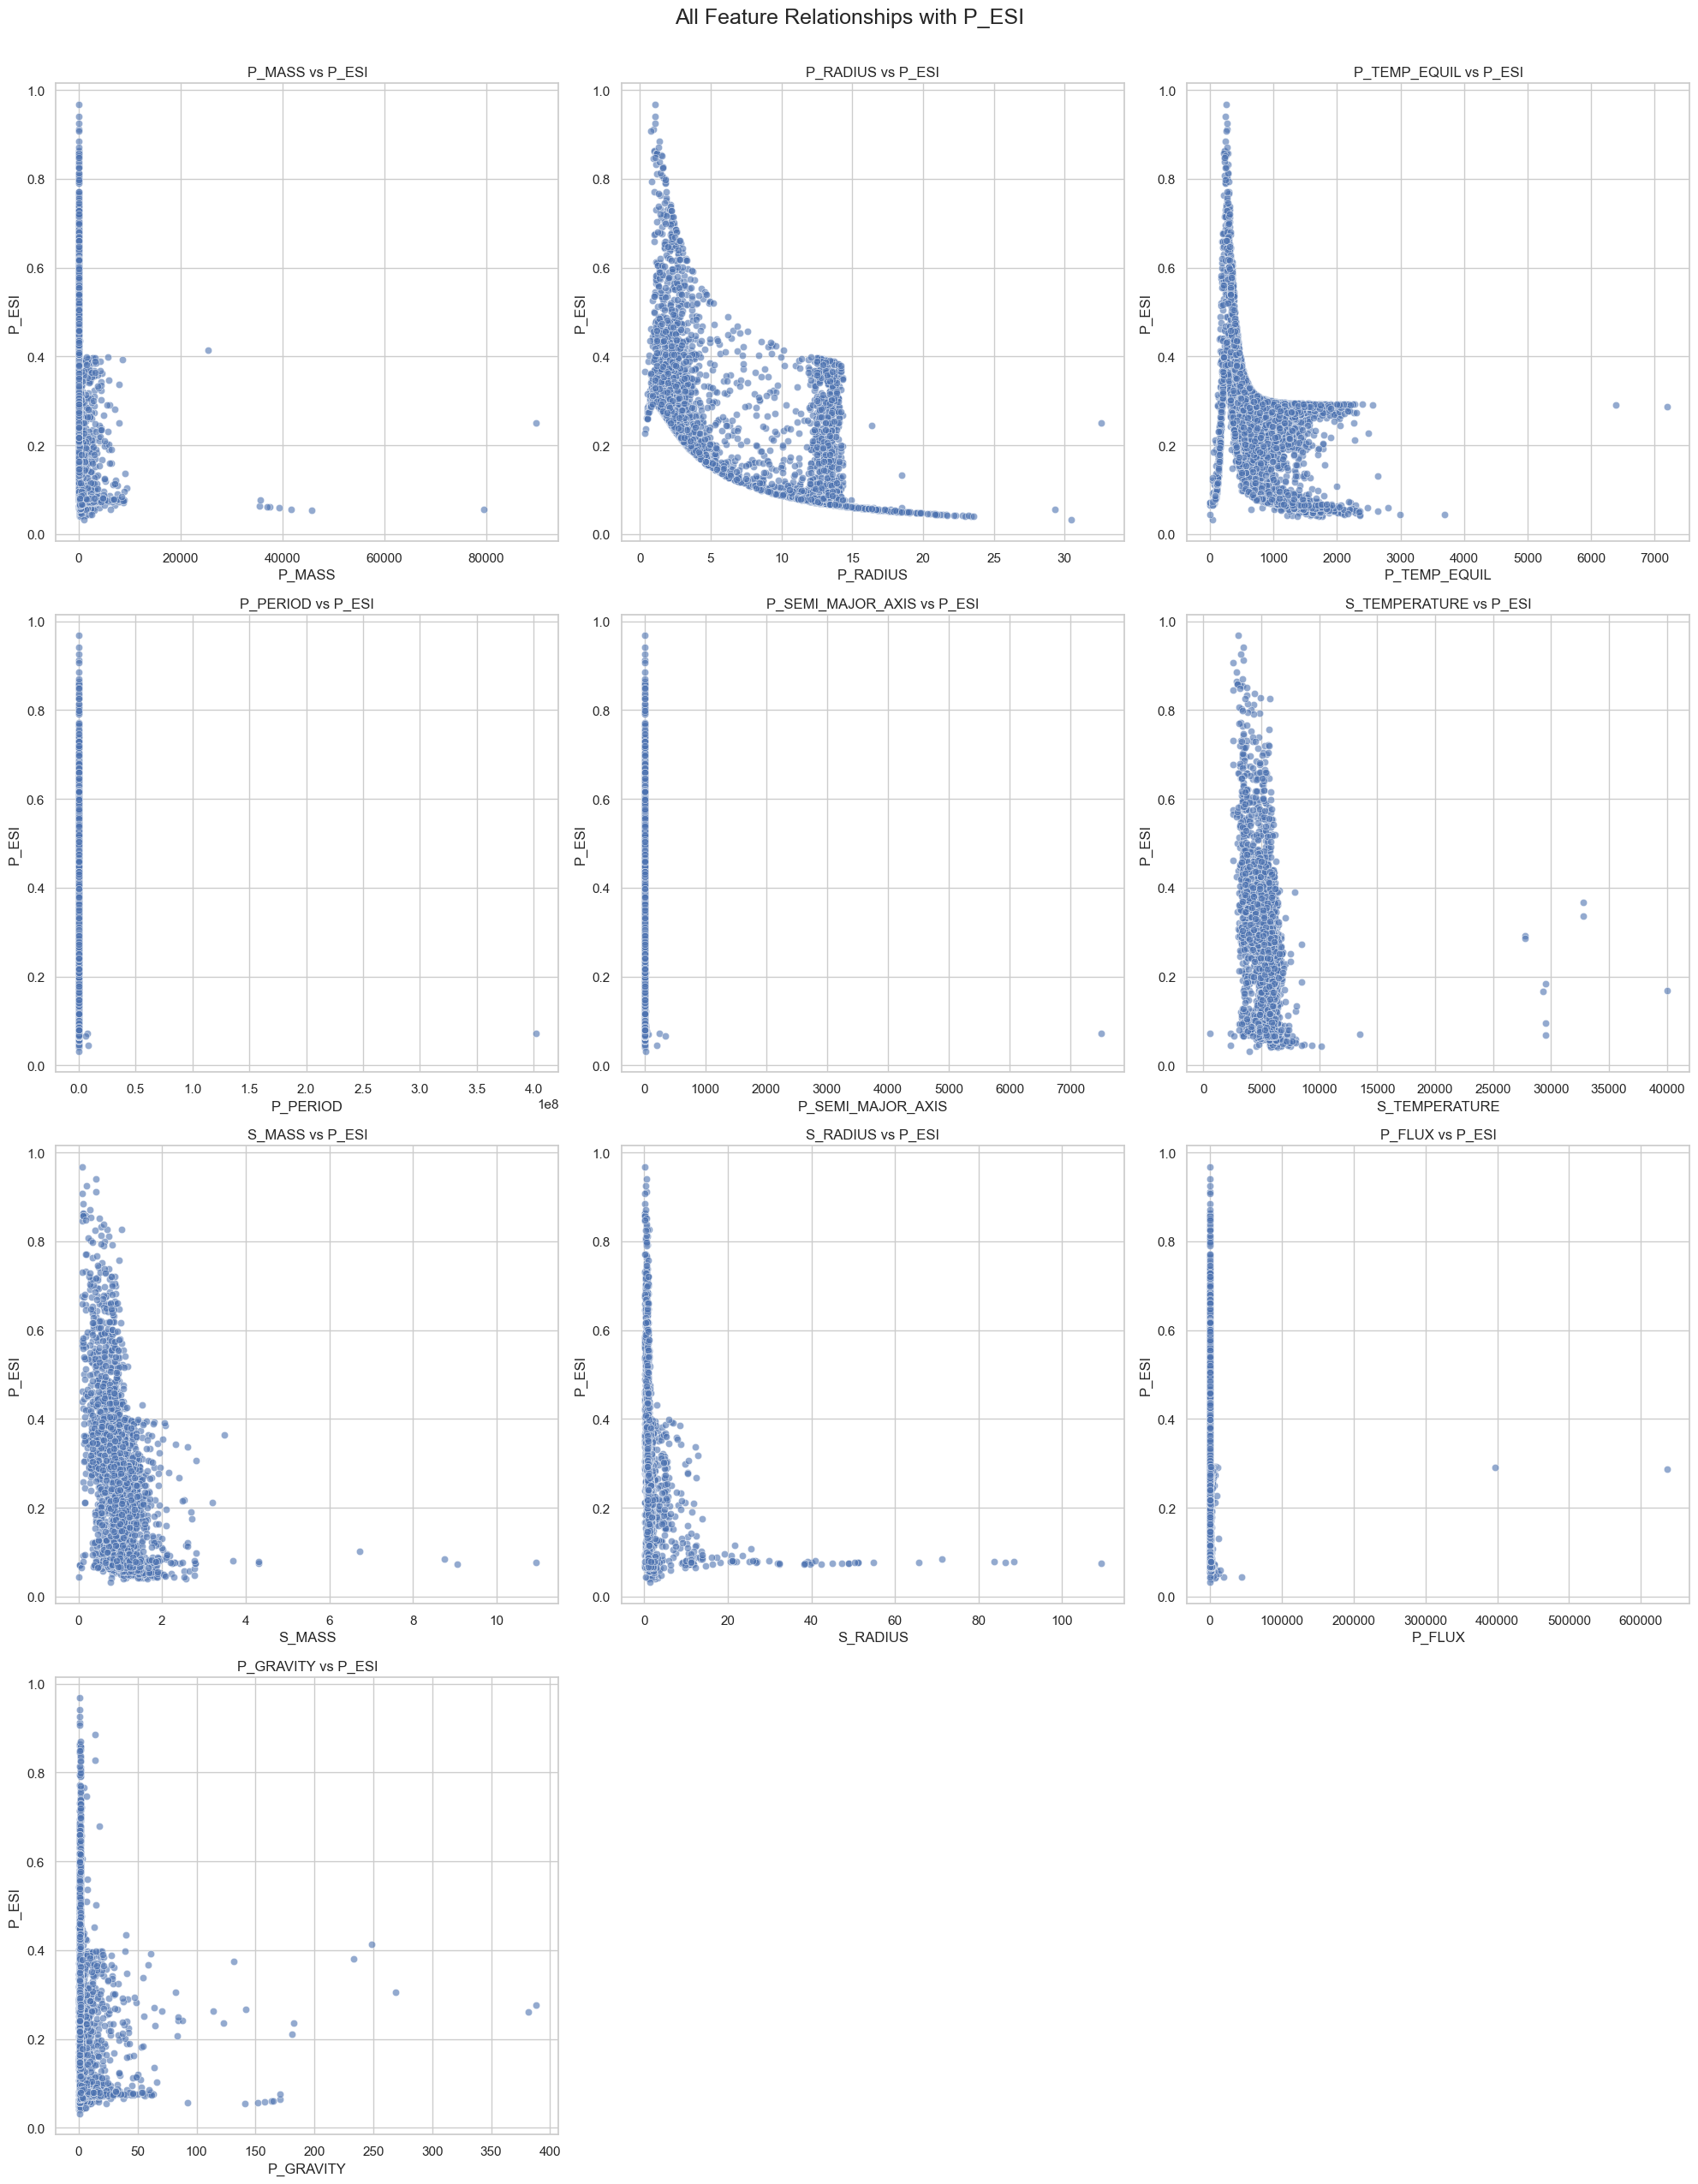

In [12]:
features = [col for col in df.columns if col != 'P_ESI']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y='P_ESI', alpha=0.6)
    plt.title(f'{feature} vs P_ESI')
    plt.xlabel(feature)
    plt.ylabel('P_ESI')

plt.tight_layout()
plt.suptitle("All Feature Relationships with P_ESI", fontsize=18, y=1.02)
plt.show()